<a href="https://colab.research.google.com/github/MarioTiara/COVID-19/blob/master/MODEL_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/MarioTiara/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 304, done.
remote: Total 304 (delta 0), reused 0 (delta 0), pack-reused 304
Receiving objects: 100% (304/304), 106.43 MiB | 52.65 MiB/s, done.
Resolving deltas: 100% (34/34), done.
Checking out files: 100% (852/852), done.


In [0]:
import os
os.chdir('/content/COVID-19/')

In [0]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
import numpy as np
from tqdm import tqdm

In [0]:
def load_data(dir_path, img_size=(100,100)):
  
    #Load resized images as np.arrays to workspace
    
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [0]:
TRAIN_DIR = '/content/COVID-19/DATA_X_RAY2/TRAIN/'
TEST_DIR = '/content/COVID-19/DATA_X_RAY2/TEST/'
VAL_DIR = '/content/COVID-19/DATA_X_RAY2/VAL/'
IMG_SIZE = (299,299)

In [12]:
X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)
X_test, y_test, _ = load_data(TEST_DIR, IMG_SIZE)
X_val, y_val, _ = load_data(VAL_DIR, IMG_SIZE)

 50%|█████     | 1/2 [00:00<00:00,  5.72it/s]

142 images loaded from /content/COVID-19/DATA_X_RAY2/TRAIN/ directory.


  0%|          | 0/2 [00:00<?, ?it/s]

20 images loaded from /content/COVID-19/DATA_X_RAY2/TEST/ directory.


100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

40 images loaded from /content/COVID-19/DATA_X_RAY2/VAL/ directory.


In [0]:
def preprocess_imgs(set_name, img_size):
    """
    Resize and apply VGG-15 preprocessing
    """
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(tf.keras.applications.vgg16.preprocess_input(img))
    return np.array(set_new)

In [0]:
X_train_prep = preprocess_imgs(set_name=X_train, img_size=IMG_SIZE)
X_test_prep = preprocess_imgs(set_name=X_test, img_size=IMG_SIZE)
X_val_prep = preprocess_imgs(set_name=X_val, img_size=IMG_SIZE)

In [0]:
IMG_DIM = (299, 299)
train_files = glob.glob('/content/COVID-19/DATA_X_RAY/DATA FULL/TRAIN/*')
train_imgs = [tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[-1].split('.')[1].strip() for fn in train_files]

validation_files = glob.glob('/content/COVID-19/DATA_X_RAY/DATA FULL/VAL2/*')
validation_imgs = [tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[-1].split('.')[1].strip() for fn in validation_files]

test_files = glob.glob('/content/COVID-19/DATA_X_RAY/DATA FULL/TEST/*')
test_imgs = [tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('\\')[-1].split('.')[1].strip() for fn in test_files]

In [18]:
print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape,
      '\tValidation dataset shape:', test_imgs .shape)

Train dataset shape: (142, 299, 299, 3) 	Validation dataset shape: (40, 299, 299, 3) 	Validation dataset shape: (20, 299, 299, 3)


In [19]:
print (train_labels)

['COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'COVID-19', '

In [20]:
print (validation_labels)

['COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL']


In [21]:
print (test_labels)

['COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL']


(299, 299, 3)


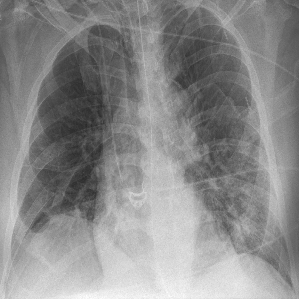

In [22]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
test_imgs_scaled  = test_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255
test_imgs_scaled /= 255

print(train_imgs[0].shape)
tf.keras.preprocessing.image.array_to_img(train_imgs[0])

In [23]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)
test_labels_enc = le.transform(test_labels)

print(train_labels[70:80], train_labels_enc[70:80])

['COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19'] [0 0 0 1 1 1 0 1 0 0]


In [24]:
vgg = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=IMG_DIM+(3,))


58892288/58889256 [==============================] - 0s 0us/step


In [0]:
NUM_CLASSES = 1

vgg16 =tf.keras.models.Sequential()
vgg16.add(vgg)
vgg16.add(tf.keras.layers.Dropout(0.3))
vgg16.add(tf.keras.layers.Flatten())
vgg16.add(tf.keras.layers.Dropout(0.5))
vgg16.add(tf.keras.layers.Dense(NUM_CLASSES, activation='sigmoid'))

In [0]:
vgg16.layers[0].trainable = False

vgg16.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
    metrics=['accuracy'])

In [0]:
vgg16.compile(loss='binary_crossentropy', optimizer=
              tf.keras.optimizers.Adam(lr=0.0003, beta_1=0.9, 
                                    beta_2=0.999, epsilon=None, decay=0.0,
                                    amsgrad=False), metrics=["accuracy"])

In [28]:
vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 9, 9, 512)         14714688  
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 41473     
Total params: 14,756,161
Trainable params: 41,473
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
train_datagen =tf.keras.preprocessing.image.ImageDataGenerator(   
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
  

val_datagen =tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

train_generator = train_datagen.flow(train_imgs, train_labels_enc,
    batch_size=32,
    seed=123)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc,
    batch_size=16,
    seed=123)

In [0]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True, verbose=1)
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, factor=0.5, min_lr=1e-6, verbose=1)

callback_list = [es, rlrop]

In [37]:
history = vgg16.fit_generator(train_generator, steps_per_epoch=70, epochs=32,
                              validation_data=val_generator, validation_steps=50, 
                              callbacks=callback_list,verbose=1)  

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/32
70/70 [==============================] - 58s 824ms/step - loss: 0.7576 - accuracy: 0.9059 - val_loss: 1.1872e-09 - val_accuracy: 1.0000 - lr: 3.0000e-04
Epoch 2/32
70/70 [==============================] - 56s 805ms/step - loss: 0.1177 - accuracy: 0.9859 - val_loss: 1.9931e-07 - val_accuracy: 1.0000 - lr: 3.0000e-04
Epoch 3/32
70/70 [==============================] - 56s 794ms/step - loss: 0.0640 - accuracy: 0.9859 - val_loss: 4.2299e-14 - val_accuracy: 1.0000 - lr: 3.0000e-04
Epoch 4/32
70/70 [==============================] - ETA: 0s - loss: 0.0400 - accuracy: 0.9914
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
70/70 [==============================] - 56s 794ms/step - loss: 0.0400 - accuracy: 0.9914 - val_loss: 2.6852e-13 - val_accuracy: 1.0000 - lr: 3.0000e-04
Epoch 5/32
70/70 [==============================] - 56s 805ms/step - loss: 0.0295 - accuracy: 0.9940 - va

In [0]:
from matplotlib import pyplot

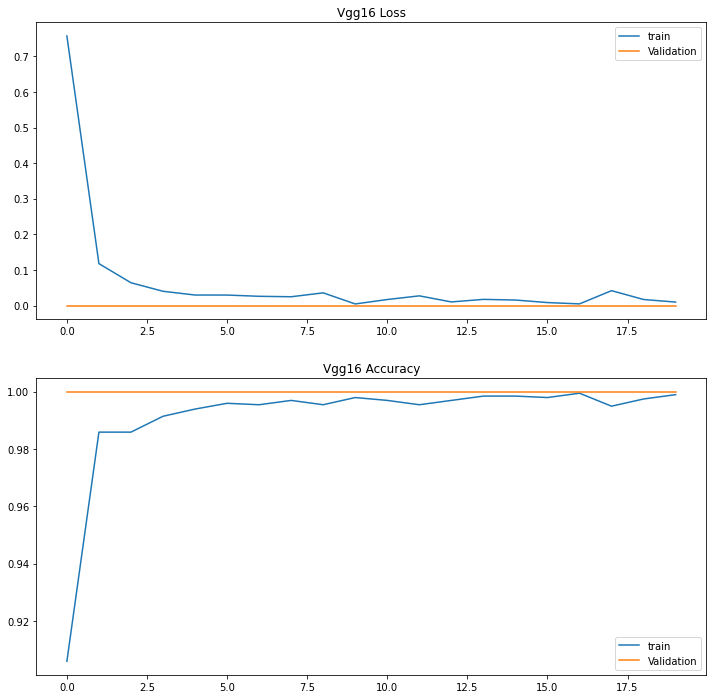

In [39]:
pyplot.figure(figsize=(12,12))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Vgg16 Loss')
pyplot.plot(history .history['loss'], label='train')
pyplot.plot(history .history['val_loss'], label='Validation')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Vgg16 Accuracy')
pyplot.plot(history .history['accuracy'], label='train')
pyplot.plot(history .history['val_accuracy'], label='Validation')
pyplot.legend()
pyplot.show()

In [0]:
# validate on val set
predictions = vgg16.predict(X_test_prep)
predictions = [1 if x>0.5 else 0 for x in predictions]

_, train_acc = vgg16.evaluate(X_val_prep ,y_val, verbose=0)
_, test_acc = vgg16.evaluate(X_test_prep, y_test, verbose=0)

In [62]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 1.000


In [64]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import itertools
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


In [65]:
kappa = cohen_kappa_score(y_test, predictions)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, predictions)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, predictions)
print(matrix)

Cohens kappa: 1.000000
ROC AUC: 1.000000
[[10  0]
 [ 0 10]]


In [0]:
history_1= history

In [0]:
def ModelGraphTrainngSummary(history,N,model_name):
    # set the matplotlib backend so figures can be saved in the background
    # plot the training loss and accuracy
    import sys
    import matplotlib
    print("Generating plots...")
    sys.stdout.flush()
    matplotlib.use("Agg")
    matplotlib.pyplot.style.use("ggplot")
    matplotlib.pyplot.figure()
    matplotlib.pyplot.plot(np.arange(0, N), history.history["loss"], label="train_loss")
    matplotlib.pyplot.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
    #matplotlib.pyplot.plot(np.arange(0, N), history.history["acc"], label="train_acc")
    #matplotlib.pyplot.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
    matplotlib.pyplot.title("Training Loss and Accuracy on COVID-19 Detection")
    matplotlib.pyplot.xlabel("Epoch #")
    matplotlib.pyplot.ylabel("Loss/Accuracy of "+model_name)
    matplotlib.pyplot.legend(loc="lower left")
    matplotlib.pyplot.savefig("plot.png")

In [0]:
def ModelGraphTrainngSummaryAcc(history,N,model_name):
    # set the matplotlib backend so figures can be saved in the background
    # plot the training loss and accuracy
    import sys
    import matplotlib
    print("Generating plots...")
    sys.stdout.flush()
    matplotlib.use("Agg")
    matplotlib.pyplot.style.use("ggplot")
    matplotlib.pyplot.figure()
    #matplotlib.pyplot.plot(np.arange(0, N), history.history["loss"], label="train_loss")
    #matplotlib.pyplot.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
    matplotlib.pyplot.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
    matplotlib.pyplot.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
    matplotlib.pyplot.title("Training Loss and Accuracy on COVID-19 Detection")
    matplotlib.pyplot.xlabel("Epoch #")
    matplotlib.pyplot.ylabel("Accuracy of "+ model_name)
    matplotlib.pyplot.legend(loc="lower left")
    matplotlib.pyplot.savefig("plot.png")

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Generating plots...
Generating plots...
Val Accuracy = 1.00


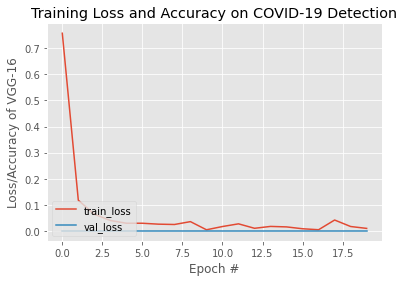

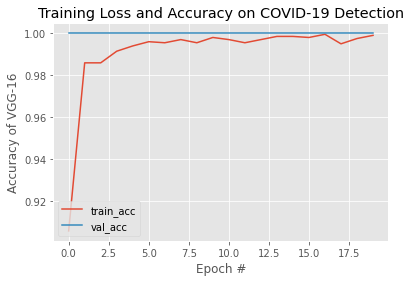

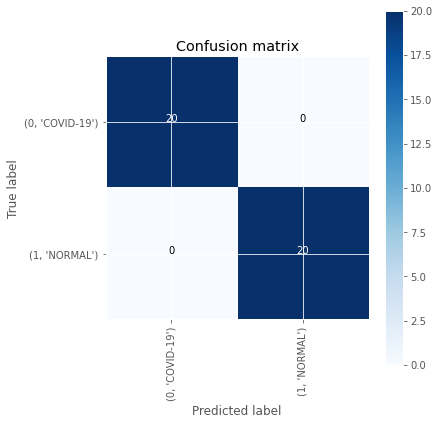

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix

for x_model in [{'name':'VGG-16','history':history_1,'model':vgg16},]:
    ModelGraphTrainngSummary(x_model['history'],20,x_model['name'])
    ModelGraphTrainngSummaryAcc(x_model['history'],20,x_model['name'])
    
    # validate on val set
    predictions = x_model['model'].predict(X_val_prep)
    predictions = [1 if x>0.5 else 0 for x in predictions]

    accuracy = accuracy_score(y_val, predictions)
    print('Val Accuracy = %.2f' % accuracy)

    confusion_mtx = confusion_matrix(y_val, predictions) 
    cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

In [0]:
vgg16.save('MODEL_VGG16_COVID-19.h5')